In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper import plot_decision_boundary
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
sns.set_style('white')


In [19]:
# Read the dataset as a pandas dataframe
df = pd.read_csv("boostingclassifier.csv")

# Read the columns latitude and longitude as the predictor variables
X = df[['latitude','longitude']].values

# Landtype is the response variable
y = df['landtype'].values

In [20]:
### edTest(test_response) ###
# update the class labels to appropriate values for AdaBoost
# Landtype has binary values like 0 and 1, we map these to -1 and 1
y = np.where(y == 0, -1, 1)

In [21]:
# AdaBoost algorithm implementation from scratch

def AdaBoost_scratch(X, y, M=10):
    '''
    X: data matrix of predictors
    y: response variable
    M: number of estimators (e.g., 'stumps')
    '''

    # Initialization of utility variables
    N = len(y)
    estimator_list = []
    y_predict_list = []
    estimator_error_list = []
    estimator_weight_list = []
    sample_weight_list = []

    # Initialize the sample weights
    sample_weight = np.ones(N) / N
    
    # Store a copy of the sample weights to a list
    # Q: why do we want to use .copy() here? The implementation will make it clear.
    sample_weight_list.append(sample_weight.copy())

    # Fit each boosted stump
    # Q: Why might we prefer the variable name '_' here over something like 'm'?
    for _ in range(M):   
        # Instantiate a Decision Tree classifier for our stump
        # Note: our stumps should have only a single split
        estimator = DecisionTreeClassifier(max_depth=1)
        
        # Fit the stump on the entire data with using the sample_weight variable
        # Hint: check the estimator's documentation for how to use sample weights
        estimator.fit(X, y, sample_weight=sample_weight)
        
        # Predict on the entire data
        y_predict = estimator.predict(X)

        # Create a binary vector representing the misclassifications
        incorrect = (y_predict != y).astype(int)

        # Compute the error as the weighted average of the 
        # 'incorrect' vector above using the sample weights
        # Hint: np.average() makes this very simple
        estimator_error = np.average(incorrect, weights=sample_weight)
        
        # Compute the estimator weight using the estimator error
        # Note: The estimator weight here is refered to as the 'learning rate' in the slides
        estimator_weight =  np.log((1 - estimator_error) / estimator_error) / 2

        # Update the sample weights (un-normalized!)
        # Note: Make use of the '*=' assignment statement
        sample_weight *= np.exp(estimator_weight * incorrect * 2 - estimator_weight)

        # Renormalize the sample weights
        # Note: Make use of the '/=' assignment statement
        sample_weight /= np.sum(sample_weight)

        # Save the iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        

    # Convert to numpy array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Compute the predictions
    # Q: Why do we want to use np.sign() here?
    preds = (np.array([np.sign((y_predict_list[:,point] * \
    estimator_weight_list).sum()) for point in range(N)]))
    
    # Return the model, estimated weights and sample weights
    return estimator_list, estimator_weight_list, sample_weight_list, preds
    

In [22]:
### edTest(test_adaboost) ###
# Call the AdaBoost function to perform boosting classification
estimator_list, estimator_weight_list, sample_weight_list, preds  = \
AdaBoost_scratch(X,y, M=9)

# Calculate the model's accuracy from the predictions returned above
accuracy = np.mean(preds == y)
print(f'accuracy: {accuracy:.3f}')

accuracy: 0.956


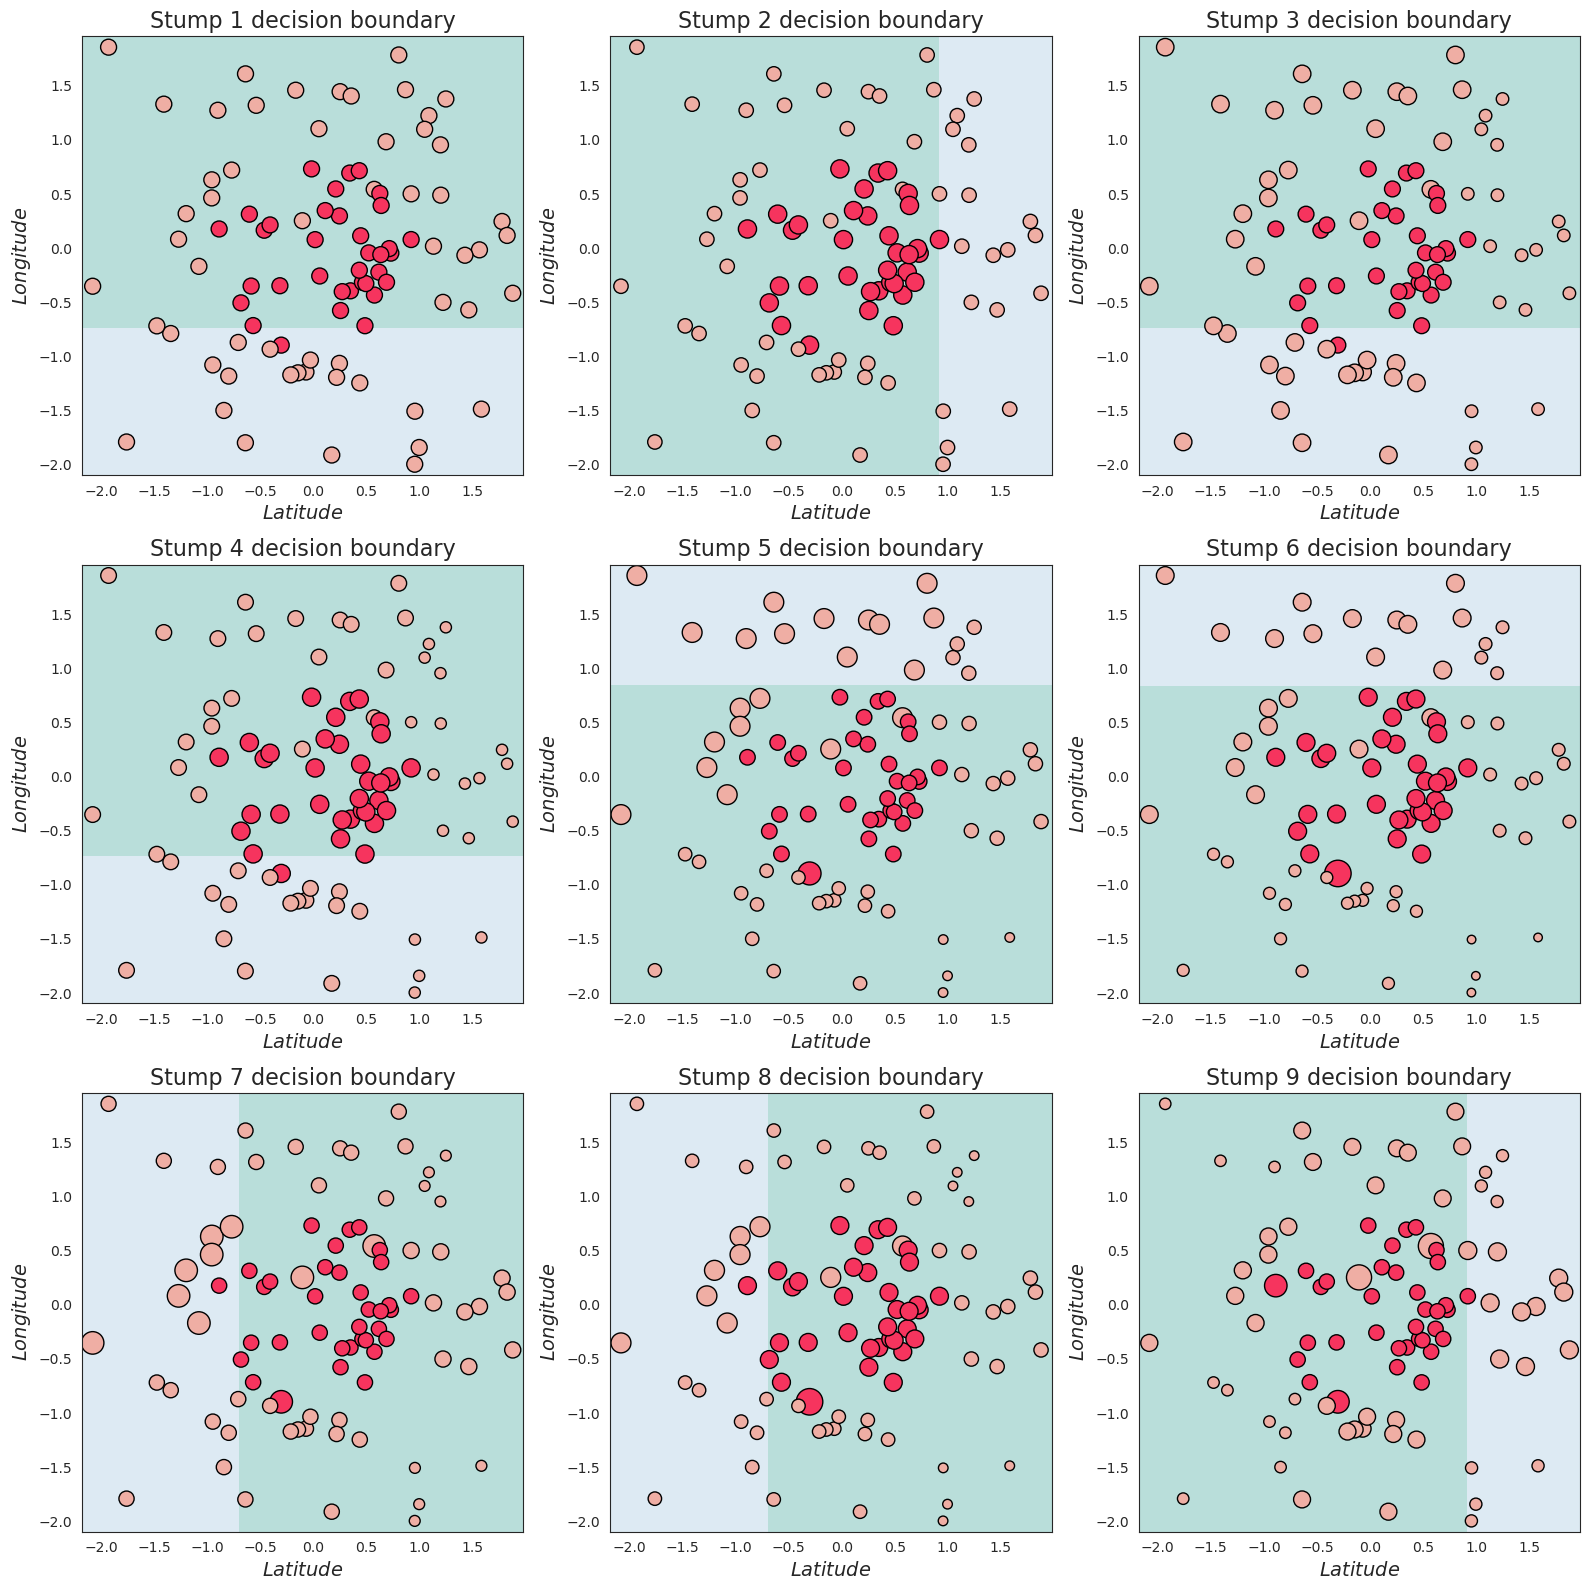

In [23]:
# Helper code to plot the AdaBoost Decision Boundary stumps
fig = plt.figure(figsize = (16,16))
for m in range(0, 9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 300
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights,counter=m)
    plt.tight_layout()
    

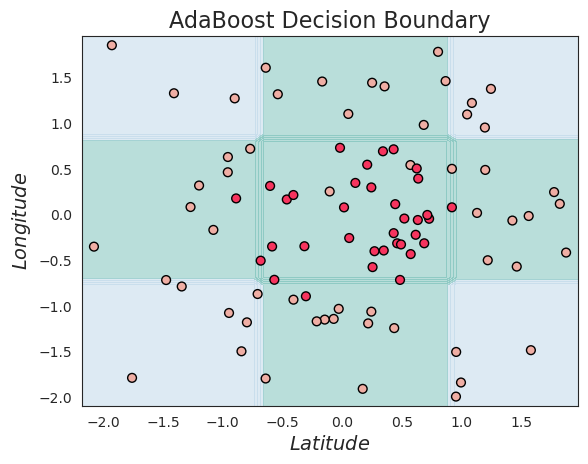

In [24]:
# Use sklearn's AdaBoostClassifier to take a look at the final decision boundary 

# Initialise the model with Decision Tree classifier as the base model same as above
# Use SAMME as the algorithm and 9 estimators
boost = AdaBoostClassifier( estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME', n_estimators=9)

# Fit on the entire data
boost.fit(X,y)

# Call the plot_decision_boundary function to plot the decision boundary of the model 
plot_decision_boundary(boost, X,y, N = 50)

plt.title('AdaBoost Decision Boundary', fontsize=16)
plt.show()


⏸ How does the `num_estimators` affect the model?

In [25]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = "Increasing the number of estimators in AdaBoost allows the model to correct more errors progressively, leading to a more accurate model and smoother decision boundary. However, adding too many estimators can cause overfitting, especially if the data is noisy."
